In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [10]:
annotations = pd.read_csv("toxicity_annotations.tsv", sep = "\t")
comments = pd.read_csv("toxicity_annotated_comments.tsv", sep = "\t")
workers = pd.read_csv("toxicity_worker_demographics.tsv", sep = "\t")

From what years are the comments?

In [27]:
print('First year: ', comments.year.min())
print('Last year: ', comments.year.max())

First year:  2001
Last year:  2016


How many comments in the dataset?

In [16]:
comments.rev_id.nunique()

159686

How many comments were marked as toxic by the majority of crowdworkers that annotated them?

In [26]:
annotations.groupby('rev_id').toxicity.mean()[annotations.groupby('rev_id').toxicity.mean() >= 0.5].count()

18397

In [28]:
annotations.groupby('rev_id').toxicity_score.mean()

rev_id
2232.0         0.4
4216.0         0.5
8953.0         0.1
26547.0        0.6
28959.0        0.2
              ... 
699848324.0    0.4
699851288.0    0.4
699857133.0    0.5
699891012.0   -0.1
699897151.0    0.4
Name: toxicity_score, Length: 159686, dtype: float64

Distribution of the average toxicity_score for each comment.

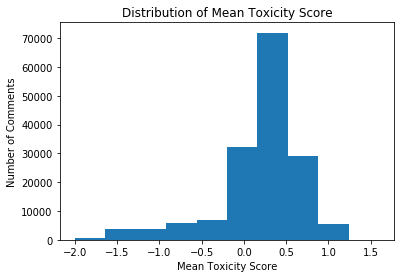

In [42]:
plt.hist(annotations.groupby('rev_id').toxicity_score.mean())
plt.title("Distribution of Mean Toxicity Score")
plt.xlabel("Mean Toxicity Score")
plt.ylabel("Number of Comments")
plt.show()

Statistics of the average toxicity_score for each comment.

In [35]:
annotations.groupby('rev_id').toxicity_score.mean().describe()

count    159686.000000
mean          0.204643
std           0.503271
min          -2.000000
25%           0.100000
50%           0.300000
75%           0.500000
max           1.600000
Name: toxicity_score, dtype: float64

'Very Toxic' comments: Number of comments with a mean toxicity score lower than -1.5.

In [40]:
annotations.groupby('rev_id').toxicity_score.mean()[annotations.groupby('rev_id').toxicity_score.mean() < -1.5].count()

1391